## 1. Import Dependencies & Data

In [27]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [28]:
# Constrain GPU usage otherwise tensorflow will eat the memory

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [29]:
# for fashion datasets
import tensorflow_datasets as tfds
# for vizualization
from matplotlib import pyplot as plt

In [30]:
# Using tensorflow datasets API for fetching fashion dataset
ds = tfds.load("fashion_mnist",split='train')

In [31]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

## 2. Vizualize Data & Dataset

In [32]:
# For data transformation
import numpy as np

In [33]:
# Setup dataset iterator
dataiterator = ds.as_numpy_iterator()

In [34]:
# Getting data out of the pipeline
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

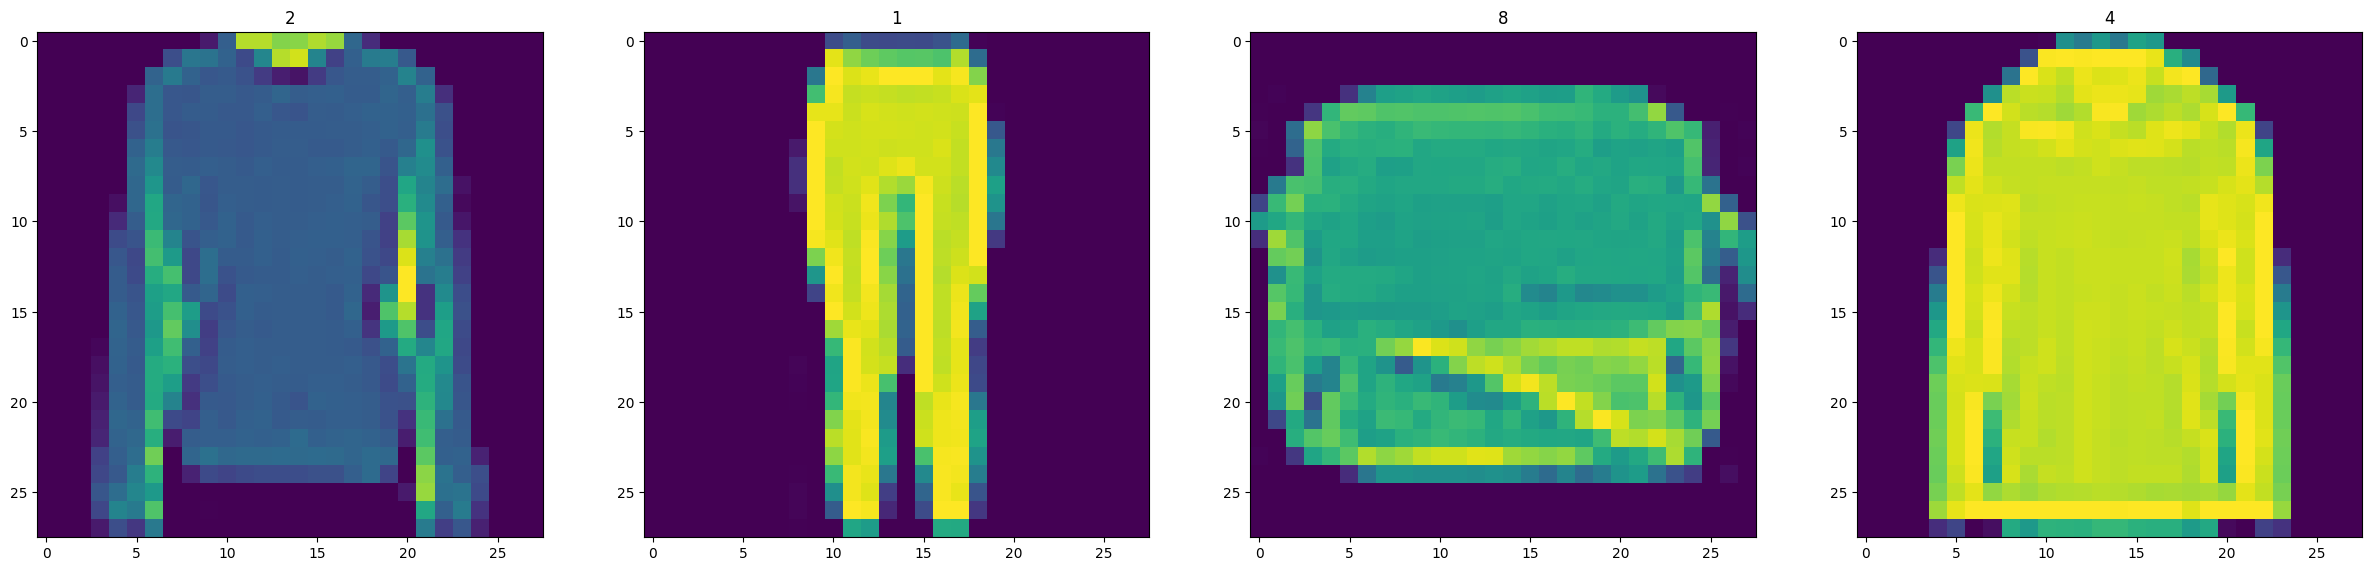

In [35]:
# Subplot formatting
fig,subplots = plt.subplots(ncols=4,figsize=(30,30))

for idx in range(4):
    # Grab image sample {image, label}
    sample = dataiterator.next()
    # Plot the image,label using a specific subplot
    subplots[idx].imshow(np.squeeze(sample['image']))
    subplots[idx].title.set_text(sample['label'])

In [36]:
# Deep learning models are generally scaled down to [0,1], hence defining a function to facilitate the same
def scale_image(data):
    image = data['image']
    return image/255

In [37]:
# Reload the dataset (Not necessary)
ds = tfds.load("fashion_mnist",split="train")

# Preprocessing steps :
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(6000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [38]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## 3. Build Neural Network 

#### 3.1 Import Modelling Components

In [39]:
# Importing sequential API for the generator & discriminator
from tensorflow.keras.models import Sequential
# Importing layers for the ANN
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

#### 3.2 Build Generator 

In [40]:
def build_generator():
    model = Sequential();

    # Takes random values & reshapes to 7x7x128
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional Layer to get one channel 
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
    
    return model

In [41]:
generator = build_generator()

In [42]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

1/1 [==============================] - 0s 93ms/step


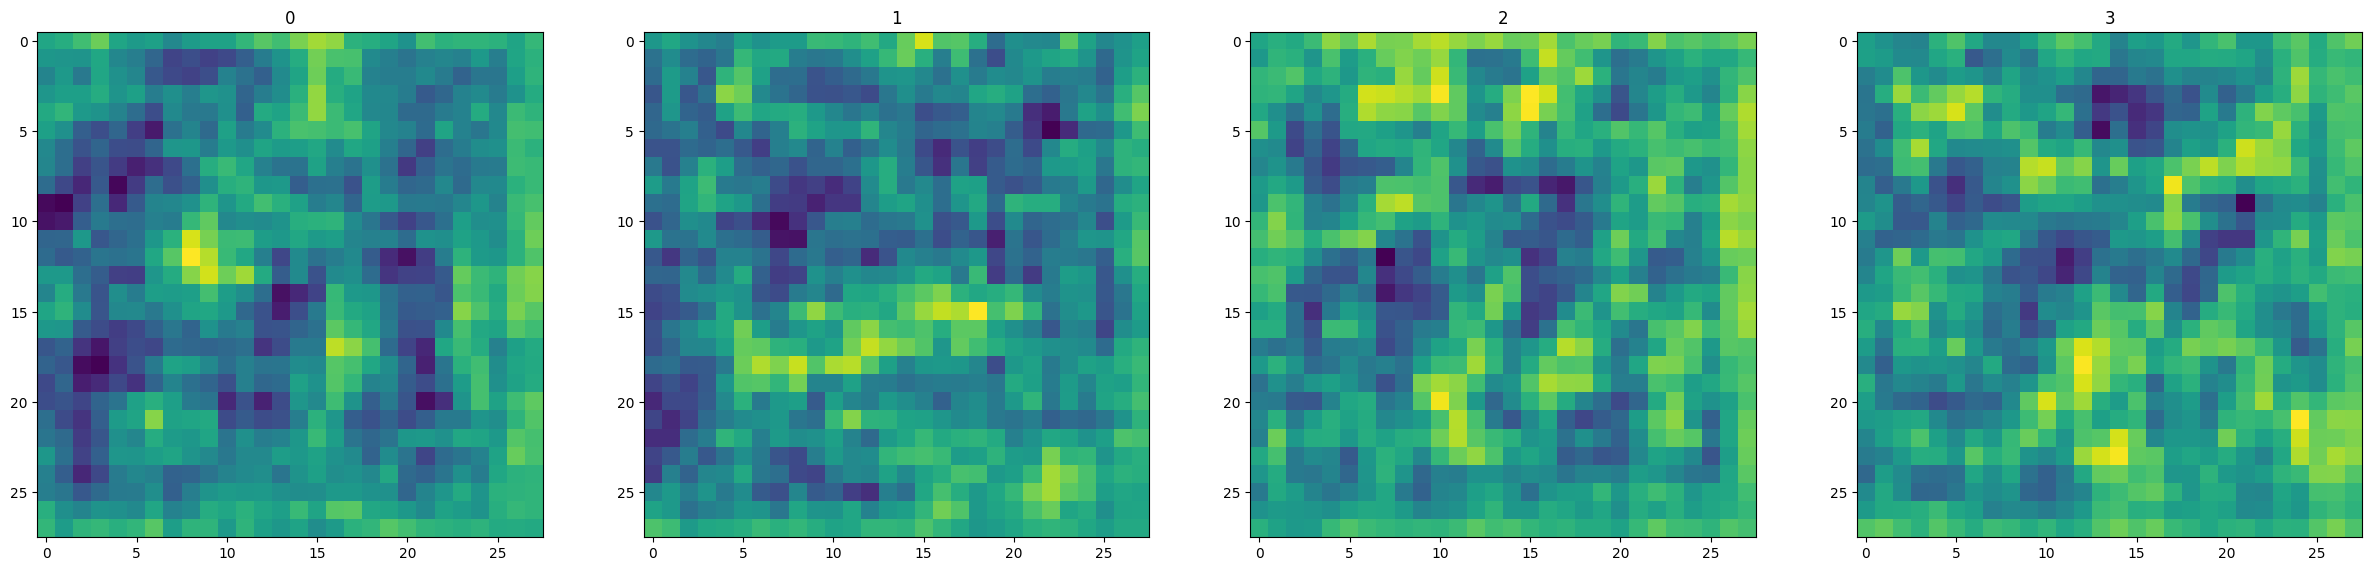

In [43]:
img = generator.predict(np.random.randn(4,128,1))

fig,subplot = plt.subplots(ncols=4,figsize=(30,30))

for ind in range(4):
    subplot[ind].imshow(np.squeeze(img[ind]))
    subplot[ind].title.set_text(ind)

#### 3.3 Build Discriminator 

In [44]:
def build_discriminator():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Convolutional Block  
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Convolutional Block  
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Convolutional Block  
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation = 'sigmoid'))
    # 1 -> real image, 0 -> fake
    
    
    return model

In [45]:
discriminator = build_discriminator()

In [46]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)      

In [47]:
# testing discriminator with random image created earlier 
discriminator.predict(img)

1/1 [==============================] - 0s 64ms/step


array([[0.49720716],
       [0.49724647],
       [0.49700543],
       [0.49713242]], dtype=float32)

## 4. Construct Training Loop 

#### 4.1 Setup Losses & Optimizers

In [48]:
# Optimizer and loss for both the models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [49]:
#  Reward generator for tricking discriminator and reward discriminator for determining the right image

In [50]:
generator_optimizer = Adam(learning_rate = 0.0001)
discriminator_optimizer = Adam(learning_rate = 0.00001)
generator_loss = BinaryCrossentropy()
discriminator_loss = BinaryCrossentropy()

#### 4.2 Build Subclassed Model

In [51]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [52]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        # Passing parameters to the base class
        super().__init__(*args,**kwargs)

        # Create attributes for gen and discriminators
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self,generator_optimizer,discriminator_optimizer,generator_loss,discriminator_loss,*args,**kwargs):
        super().compile(*args,**kwargs)
        
        # Create attributes for optimizers
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer
        
        # Create attributes for losses
        self.generator_loss = generator_loss
        self.discriminator_loss = discriminator_loss
    
    #  the following gets called when .fit() is called
    def train_step(self,batch,):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training= False)

        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            
            # Pass the real & fake images to the discriminator model 
            yhat_real = self.discriminator(real_images,training=True)
            yhat_fake = self.discriminator(fake_images,training=True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)
            
            # Create labels for real & fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
            # real images : 0, fake images : 1

            # Injecting some noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_real))
            y_realfake += tf.concat([noise_real,noise_fake],axis=0)
    
            # Calculate loss - BinaryCrossentropy
            total_discriminator_loss = self.discriminator_loss(y_realfake,yhat_realfake) 

        # Apply backpropagation - ANN learn
        discriminator_gradient = d_tape.gradient(total_discriminator_loss,self.discriminator.trainable_variables)
        self.discriminator_optimizer.apply_gradients(zip(discriminator_gradient,self.discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:
            # Generator some new images
            generated_images = self.generator(tf.random.normal((128,128,1)),training=True)
            
            # Create the predicted labels
            predicted_labels = self.discriminator(generated_images,training=False)
            
            # Calculate the loss (rewarding our generator for faking out the discriminator, i.e. if the discriminator thinks that the image is real
            total_generator_loss = self.generator_loss(tf.zeros_like(predicted_labels),predicted_labels)
        
        # Apply backpropagation
        generator_gradient = g_tape.gradient(total_generator_loss,self.generator.trainable_variables)
        self.generator_optimizer.apply_gradients(zip(generator_gradient,self.generator.trainable_variables))

        return {"discriminator_loss" : total_discriminator_loss, "generator_loss" : total_generator_loss }

In [53]:
# Instance of our subclassed model
fashGAN = FashionGAN(generator,discriminator)

In [54]:
# Compile the model
fashGAN.compile(generator_optimizer,discriminator_optimizer,generator_loss,discriminator_loss)

#### 4.3 Build Callback

In [55]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [56]:
class ModelMonitor(Callback):
    def __init__(self,num_img=3,latent_dim = 128):
        self.num_img = num_img
        self.latent_dim = latent_dim
    def on_epoch_end(self,epoch,logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *=255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))
        

#### 4.4 Train

In [ ]:
hist = fashGAN.fit(ds,epochs=2000)
# Uncomment the following line for monitoring the model while it's under build: 
# hist = fashGAN.fit(ds,epochs=2000,callbacks = [ModelMonitor()])

## Test Out The Generator

#### 5.1 Generate Images

In [6]:
# Loading model computed on kaggle: 
import tensorflow as tf
generator = tf.keras.saving.load_model('./models/generator_800_epoch.hdf5')

images = generator.predict(tf.random.normal((16,128,1)))

1/1 [==============================] - 0s 173ms/step


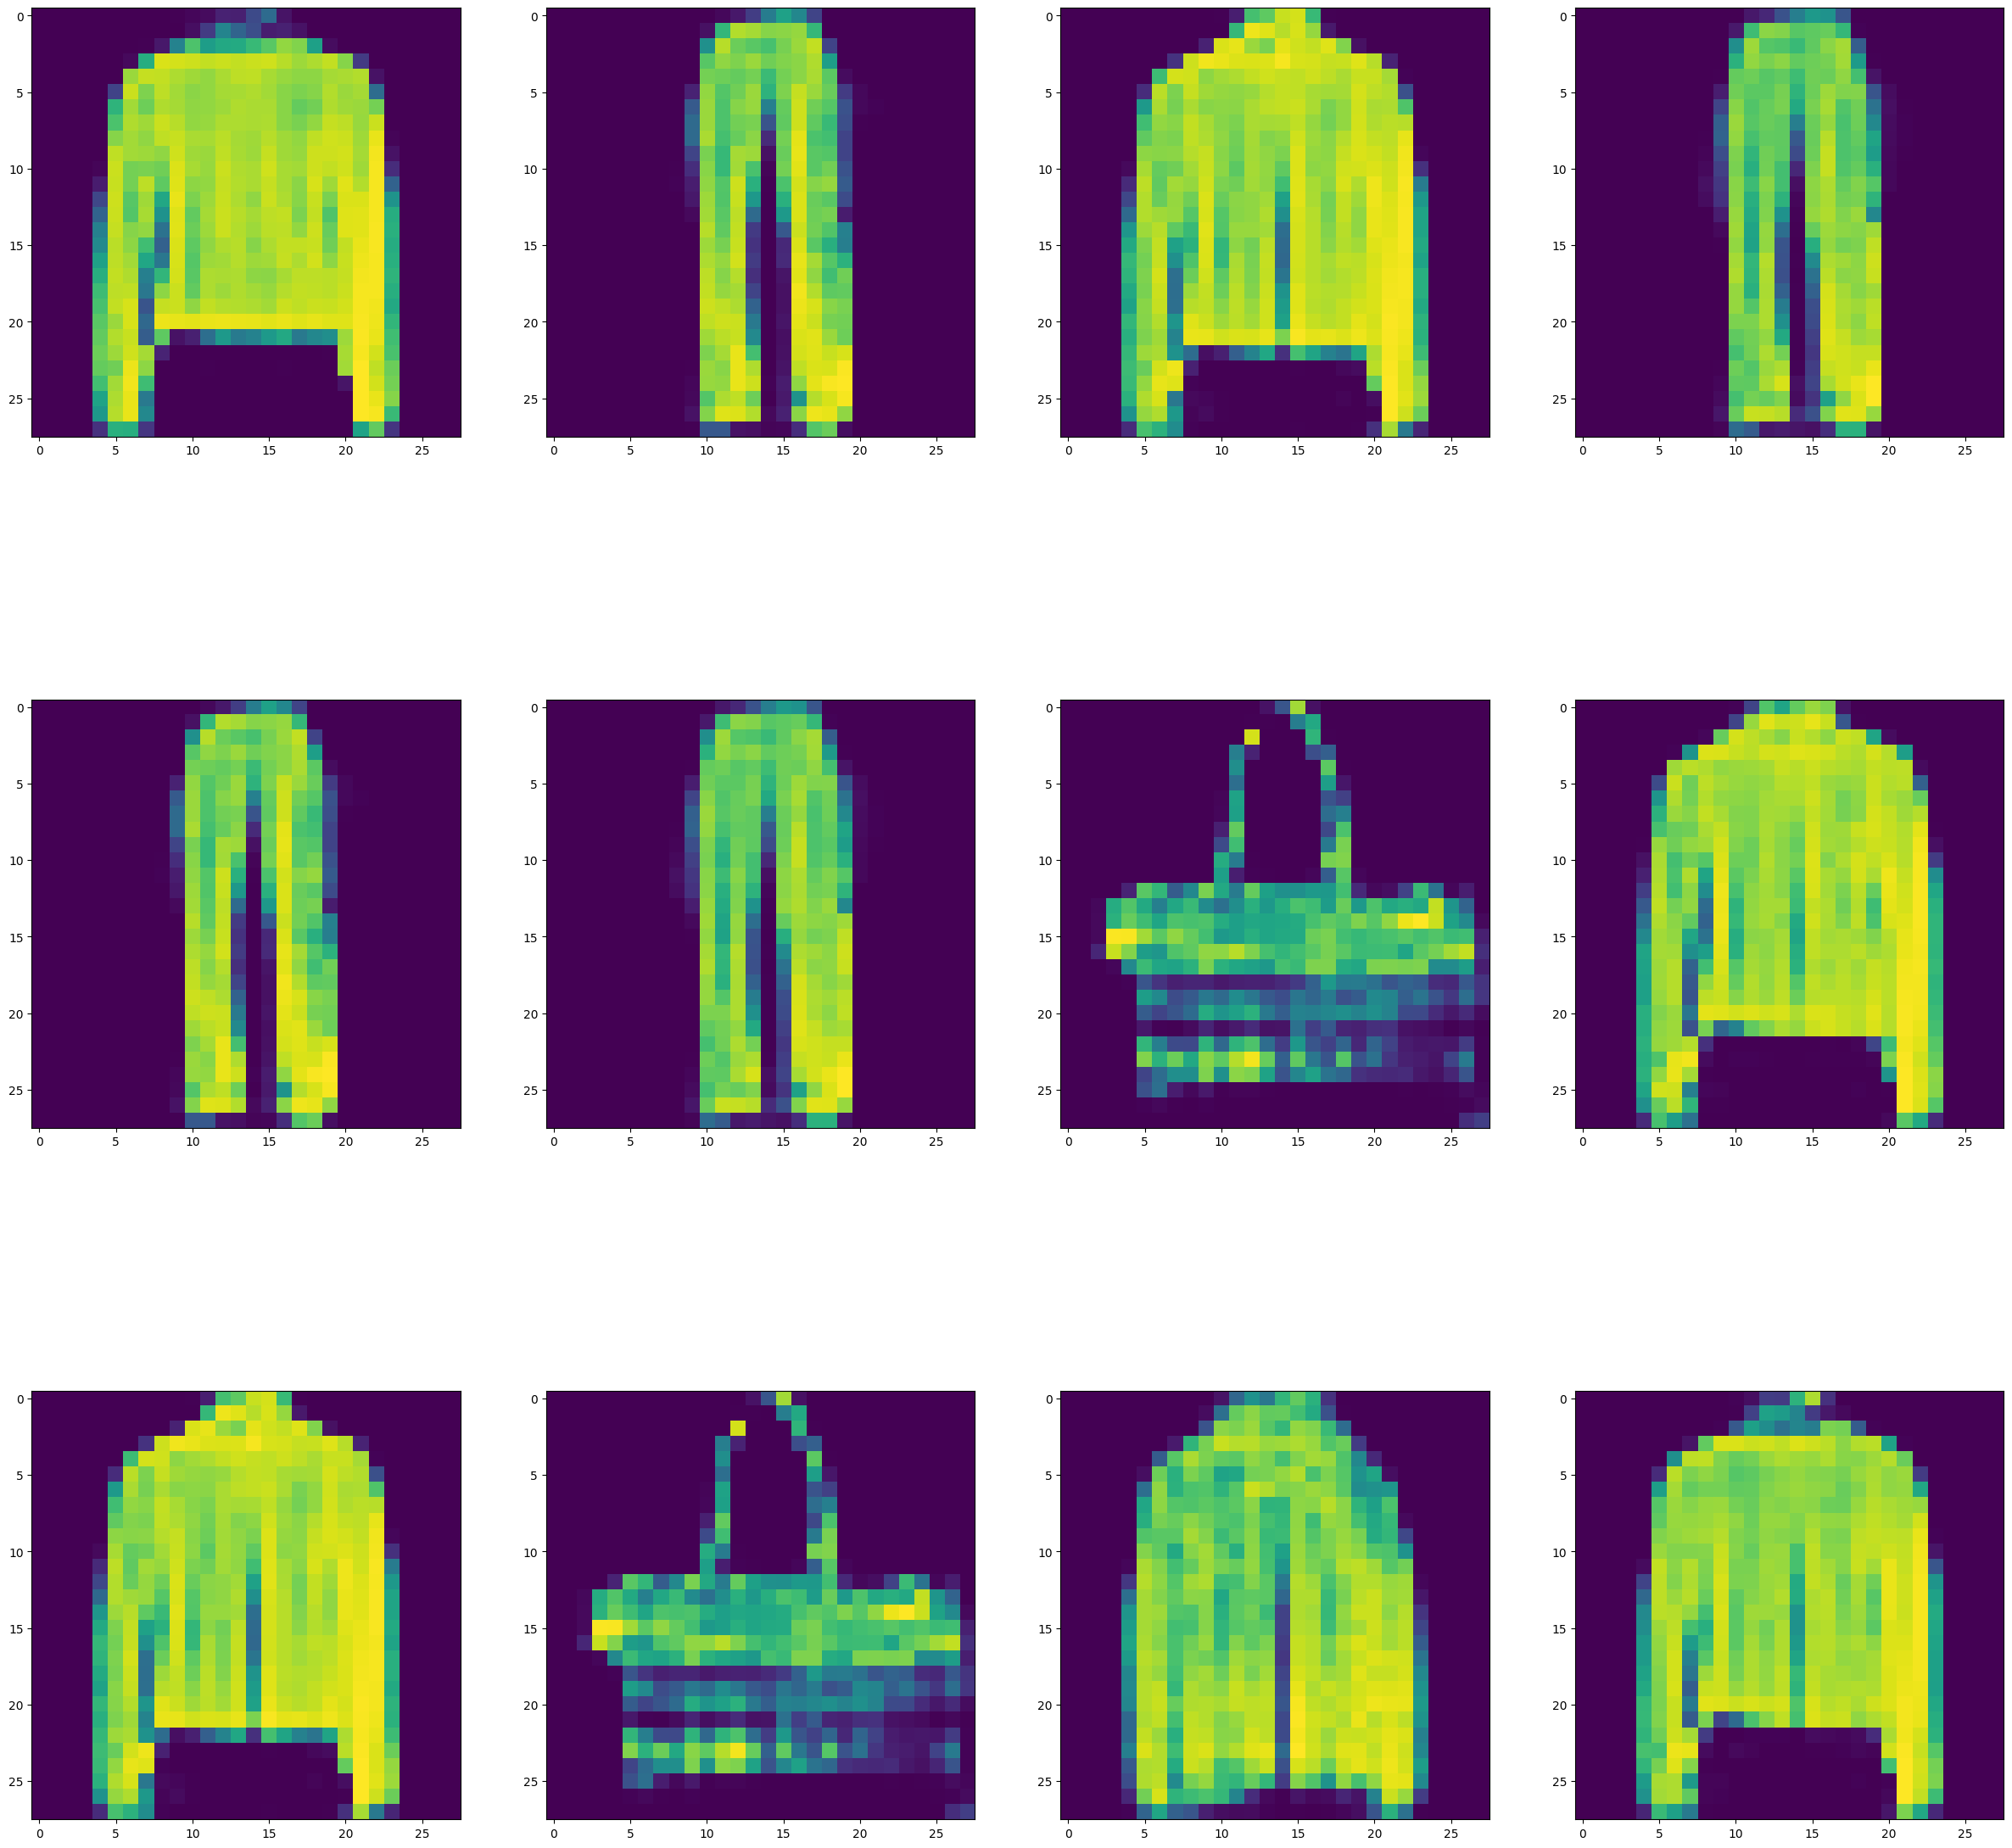

In [8]:
fig,subplots = plt.subplots(nrows=3, ncols=4, figsize=(30, 30))
for row in range(3):
    for col in range(4):
        subplots[row][col].imshow(images[(row+1)*(col+1)-1])
plt.show()